# Machine Learning: Capstone Project
#### By Lina Santoyo

####  For this assignment, we will examine the Census Income dataset available at the UC Irvine Machine Learning Repository. We aim to predict whether an individual’s income will be greater than 50,000 usd per year based on several attributes from the census data. In order for us to do that we will analize the data, select the variables and use 



### 1. Importing libraries and data set

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import sklearn
from sklearn import datasets 
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as sklm
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, train_test_split
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv((r"db/censuss.csv"))
pd.set_option('precision', 0)
print(df.shape)
df.head(10)

(32537, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,36,Private,155537,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
2,28,Private,92262,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,59,Private,199713,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
4,60,Private,199378,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
5,37,Private,200153,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
6,49,Private,31339,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
7,44,Private,167725,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
8,48,Private,349151,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
9,30,Private,236770,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0


###  2. Exploratory data analysis

In [289]:
# Finding nulls, unknowns and having a general description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  y               32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [290]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
y                 0
dtype: int64

In [291]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537,4e+01,1e+01,17,28,37,48,9e+01
fnlwgt,32537,2e+05,1e+05,12285,117827,178356,236993,1e+06
education-num,32537,1e+01,3e+00,1,9,10,12,2e+01
capital-gain,32537,1e+03,7e+03,0,0,0,0,1e+05
capital-loss,32537,9e+01,4e+02,0,0,0,0,4e+03
hours-per-week,32537,4e+01,1e+01,1,40,40,45,1e+02
y,32537,2e-01,4e-01,0,0,0,0,1e+00


In [292]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
y                     2
dtype: int64

In [293]:
# check duplicates and remove it
print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 0
After removing duplicates: 0


###  2. 1 Analizing missing values and general distribution of the variables
When loading the data,some values with the "?" value appered so we need to explore and know more about it. We have to understand how many they are and how that is going to affect our analysis and the usage of the classifier

In [295]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'y'],
      dtype='object')

### 2.1.1 Age

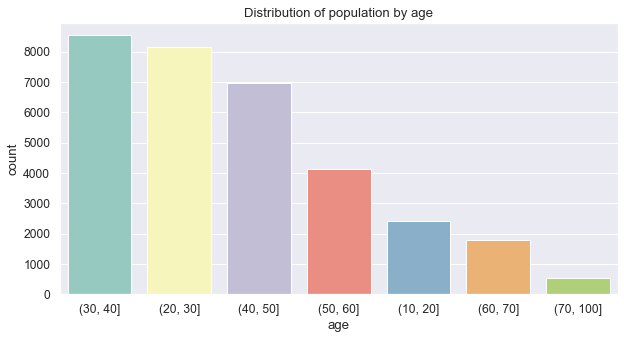

In [297]:
bins = [10, 20, 30, 40, 50, 60, 70, 100]
cats = pd.cut(df.age, bins)
plt.figure(figsize = (10,5))
ax = sns.countplot(cats, palette= "Set3",
                   order = cats.value_counts().index)
sns.set(font_scale=1.1)
ax.set_title('Distribution of population by age')
value=round(cats.value_counts()/len(cats)*100,2)

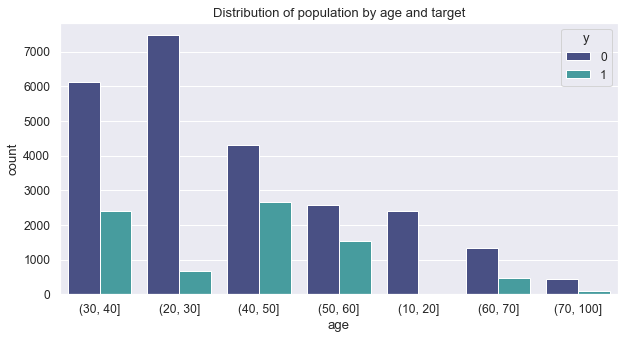

In [298]:
bins = [10, 20, 30, 40, 50, 60, 70, 100]
cats = pd.cut(df.age, bins)
plt.figure(figsize = (10,5))
ax = sns.countplot(cats, palette="mako",hue=df["y"],
                   order = cats.value_counts().index)
sns.set(font_scale=1.1)
ax.set_title('Distribution of population by age and target')
value=round(cats.value_counts()/len(cats)*100,2)


The majority of people it's between 20 and 30 years old but the proportion of that people earning more than 50K it's very little. We can see clearly how the bigger proportion of people earning more than 50K it's people between 50 and 60 years which makes sense because they are mostly at the end of their professional career meaning they have had already a lot of experience.



### 2.1.2 Job (Workclass) 

In [299]:
df['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [300]:
len(df["workclass"])

32537

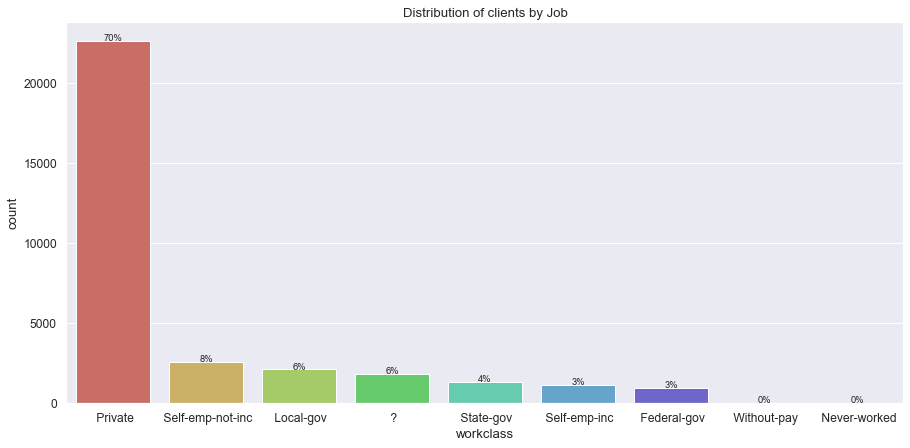

In [301]:
plt.figure(figsize = (15,7))
jobx = sns.countplot(df["workclass"], palette="hls",
                   order = df["workclass"].value_counts().index)
jobx.set_title('Distribution of clients by Job')
sns.set(font_scale=0.78)
value=round(df["workclass"].value_counts()/len(df["workclass"])*100,2)

#total= (32562)
for p in jobx.patches:
    height = p.get_height()
    jobx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/len(df["workclass"]))*100),
            ha="center") 

 
    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


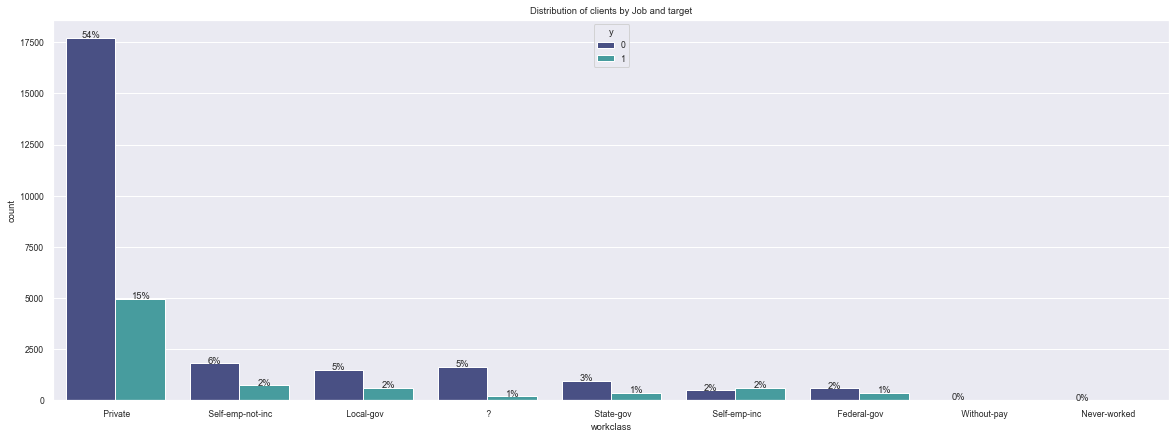

In [302]:
plt.figure(figsize = (20,7))
jobx = sns.countplot(df["workclass"], palette="mako", hue=df['y'],
                   order = df["workclass"].value_counts().index)
jobx.set_title('Distribution of clients by Job and target')
sns.set(font_scale=0.78)
value=round(df["workclass"].value_counts()/len(df["workclass"])*100,2)

for p in jobx.patches:
    height = p.get_height()
    jobx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/len(df["workclass"]))*100),
            ha="center") 

We notice that we have 6% of the values as unknown, very close to other 2 categories so it's a significant amount. 
Even if the vast maayority work on a private field, the self-employee category is the only one with a bigger percentage of people earning more than 50K.

###  2.1.3 Eduacation

In [303]:
df['education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

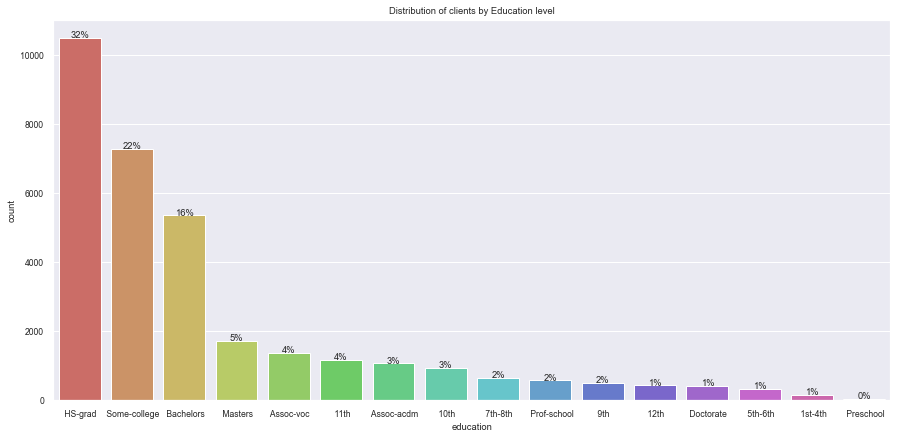

In [304]:
plt.figure(figsize = (15,7))
edux = sns.countplot(df["education"], palette="hls", #hue=df['y'],
                   order = df["education"].value_counts().index)
edux.set_title('Distribution of clients by Education level')
sns.set(font_scale=0.78)
value=round(df["education"].value_counts()/len(df["education"])*100,2)

total= (32562)
for p in edux.patches:
    height = p.get_height()
    edux.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/(total))*100),
            ha="center") 


posx and posy should be finite values
posx and posy should be finite values


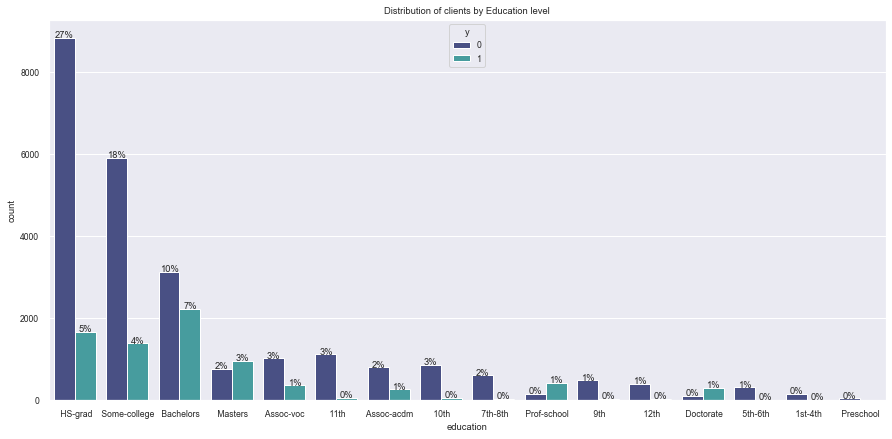

In [305]:
plt.figure(figsize = (15,7))
edux = sns.countplot(df["education"], palette="mako", hue=df['y'],
                   order = df["education"].value_counts().index)
edux.set_title('Distribution of clients by Education level')
sns.set(font_scale=0.78)
value=round(df["education"].value_counts()/len(df["education"])*100,2)

total= (32562)
for p in edux.patches:
    height = p.get_height()
    edux.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/(total))*100),
            ha="center") 

Here it's important to remark how clear is it that the biggest proportion of people earning more than 50K have a Bachelor degree. Now we see how this variable it's very important for our analysis.

### 2.1.4 Relationship and Sex


In [306]:
df['relationship'].value_counts()

 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

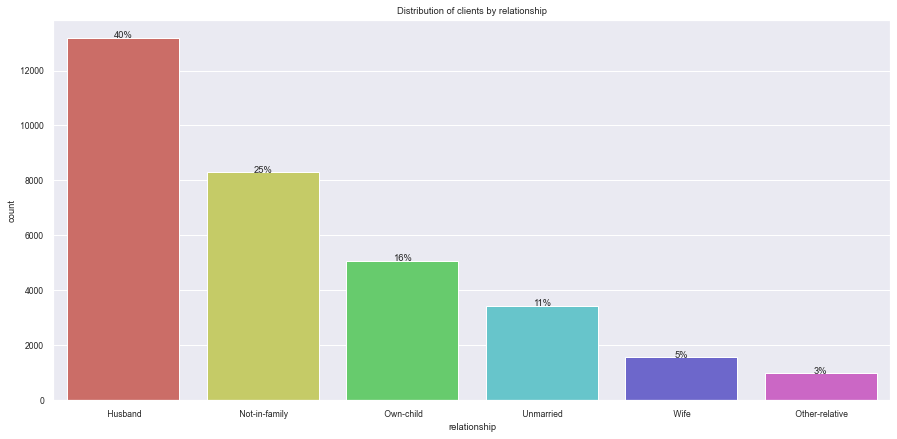

In [307]:
plt.figure(figsize = (15,7))
relx = sns.countplot(df["relationship"], palette="hls",
                   order = df["relationship"].value_counts().index)
relx.set_title('Distribution of clients by relationship')
sns.set(font_scale=0.78)
value=round(df["relationship"].value_counts()/len(df["relationship"])*100,2)

total= (32562)
for p in relx.patches:
    height = p.get_height()
    relx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/(total))*100),
            ha="center") 

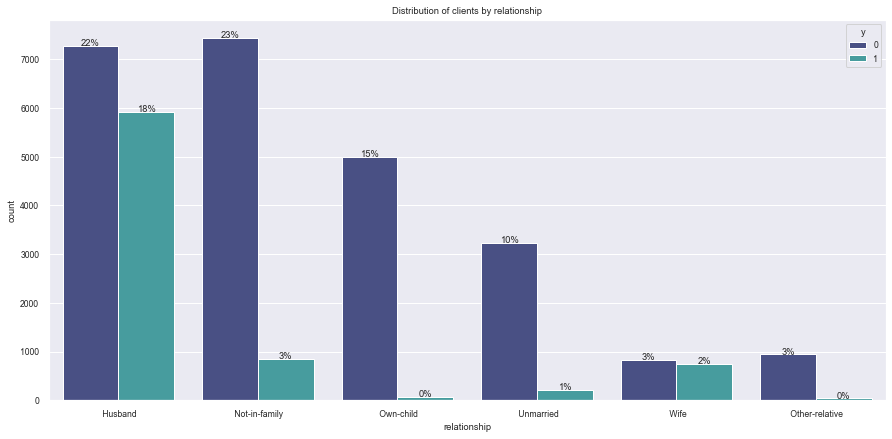

In [308]:
plt.figure(figsize = (15,7))
relx = sns.countplot(df["relationship"], palette="mako",hue=df['y'],
                   order = df["relationship"].value_counts().index)
relx.set_title('Distribution of clients by relationship')
sns.set(font_scale=0.78)
value=round(df["relationship"].value_counts()/len(df["relationship"])*100,2)

total= (32562)
for p in relx.patches:
    height = p.get_height()
    relx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/(total))*100),
            ha="center") 

In [309]:
df['sex'].value_counts()

 Male      21775
 Female    10762
Name: sex, dtype: int64

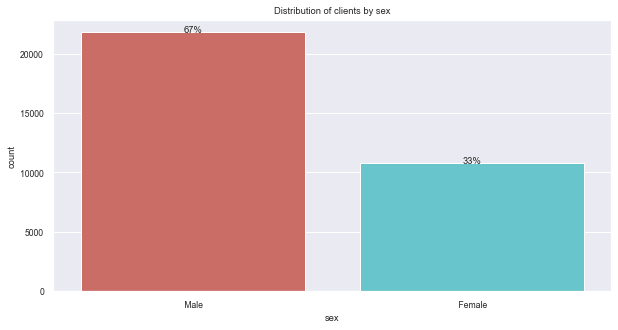

In [310]:
plt.figure(figsize = (10,5))
sexx = sns.countplot(df["sex"], palette="hls",
                   order = df["sex"].value_counts().index)
sexx.set_title('Distribution of clients by sex')
sns.set(font_scale=0.78)
value=round(df["sex"].value_counts()/len(df["sex"])*100,2)

total= (32562)
for p in sexx.patches:
    height = p.get_height()
    sexx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/(total))*100),
            ha="center") 

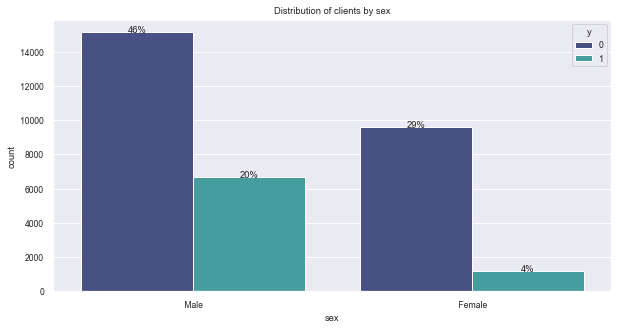

In [311]:
plt.figure(figsize = (10,5))
sexx = sns.countplot(df["sex"], palette="mako", hue=df['y'],
                   order = df["sex"].value_counts().index)
sexx.set_title('Distribution of clients by sex')
sns.set(font_scale=0.78)
value=round(df["sex"].value_counts()/len(df["sex"])*100,2)

total= (32562)
for p in sexx.patches:
    height = p.get_height()
    sexx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/(total))*100),
            ha="center") 

I decide to analyze these two variables together because it's pretty obvious how Man are earning proportionally more than woman. We can not separate the sex to the role that they play into the family, that's why it's important to see that of course they are related. In general, if Males earn more than woman, of course it's expectable to find Husband as the primary person with a higher than 50K at home.

### 2.1.5 Nationality

In [312]:
df['native-country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

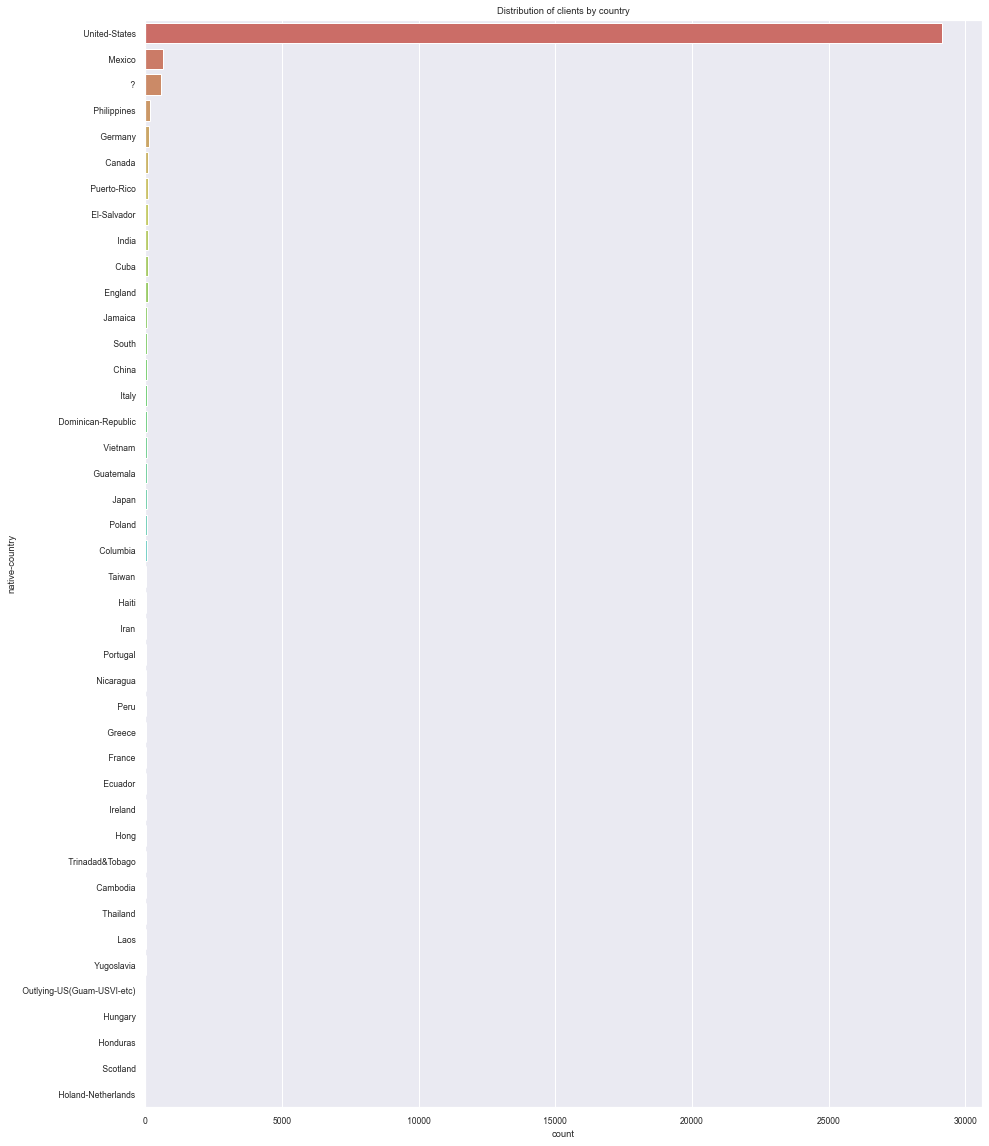

In [313]:
plt.figure(figsize = (15,20))
natx = sns.countplot(y=df["native-country"], palette="hls",
                   order = df["native-country"].value_counts().index)
natx.set_title('Distribution of clients by country')
sns.set(font_scale=1)
value=round(df["native-country"].value_counts()/len(df["native-country"])*100,2)


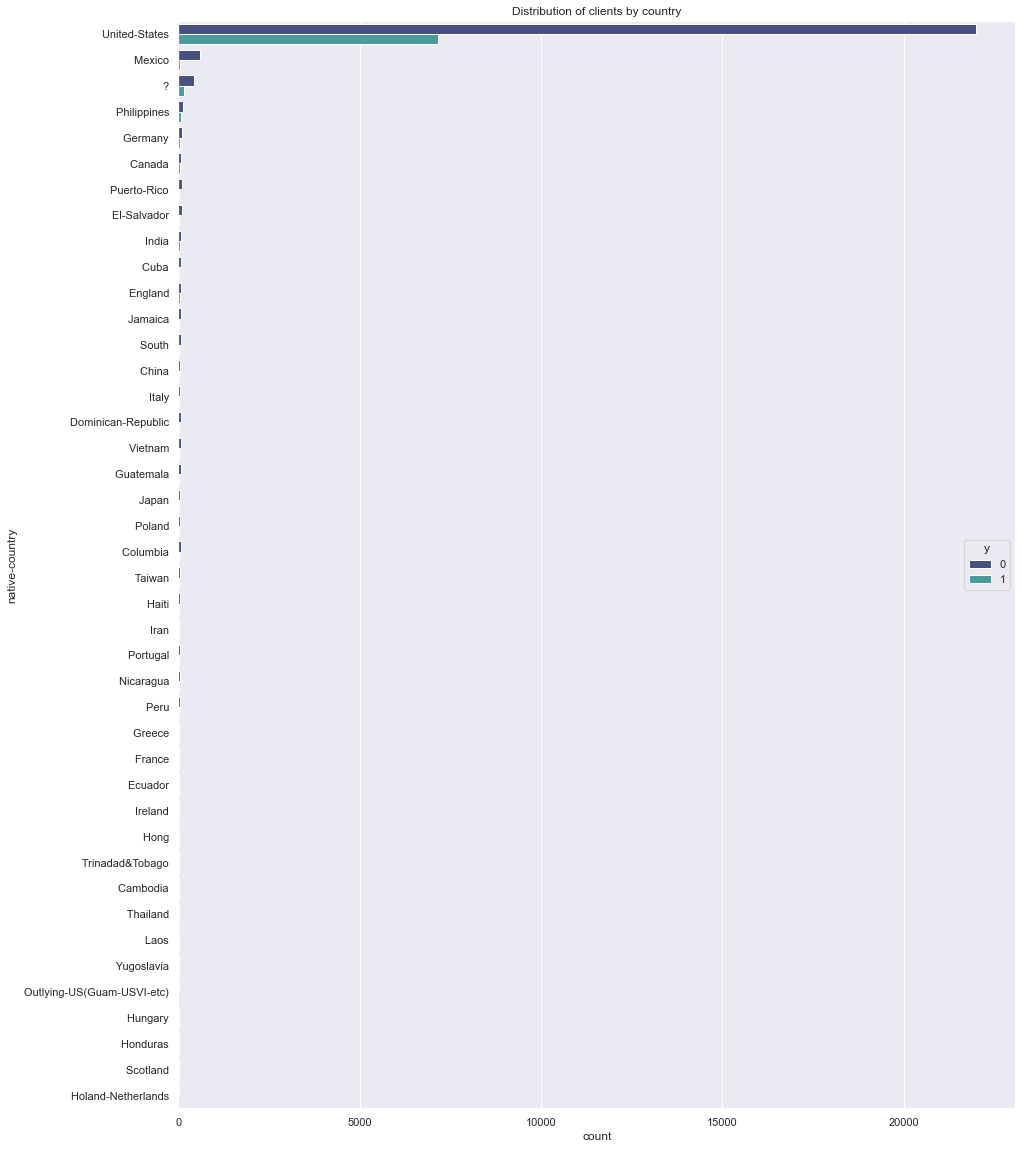

In [314]:
plt.figure(figsize = (15,20))
natx = sns.countplot(y=df["native-country"], palette="mako", hue=df['y'],
                   order = df["native-country"].value_counts().index)
natx.set_title('Distribution of clients by country')
sns.set(font_scale=1)
value=round(df["native-country"].value_counts()/len(df["native-country"])*100,2)

This variable its very unbalanced and doesn't give us a lot of information. It's expectable to find more people from the country we ae analyzing but the other extra data doesn't seem to be either clear or valuable so we might think about dropping this column for later analysis.

### 2.1.6 Race

In [315]:
df['race'].value_counts()

 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

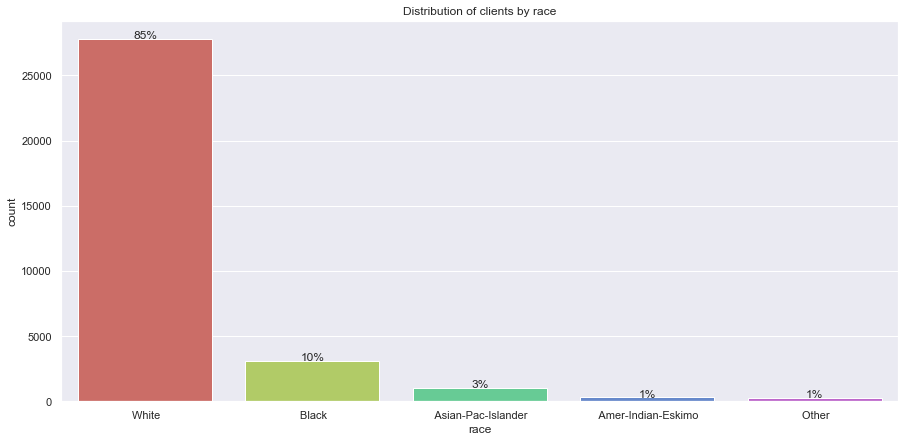

In [316]:
plt.figure(figsize = (15, 7))
racx = sns.countplot(x=df["race"], palette="hls",
                   order = df["race"].value_counts().index)
racx.set_title('Distribution of clients by race')
sns.set(font_scale=1)
value=round(df["race"].value_counts()/len(df["race"])*100,2)

total= (32562)
for p in racx.patches:
    height = p.get_height()
    racx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/(total))*100),
            ha="center") 

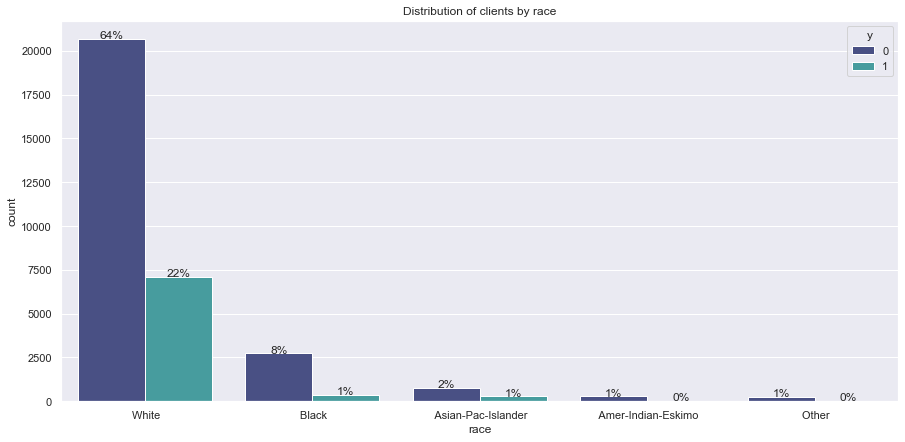

In [317]:
plt.figure(figsize = (15, 7))
racx = sns.countplot(x=df["race"], palette="mako", hue=df['y'],
                   order = df["race"].value_counts().index)
racx.set_title('Distribution of clients by race')
sns.set(font_scale=1)
value=round(df["race"].value_counts()/len(df["race"])*100,2)

total= (32562)
for p in racx.patches:
    height = p.get_height()
    racx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/(total))*100),
            ha="center") 

The vast majority it's White but more than one quarter of them make more than 50K per year, in comparasson with black people with way less in proportion. 

### 2.1.7. Occupation

In [318]:
df['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

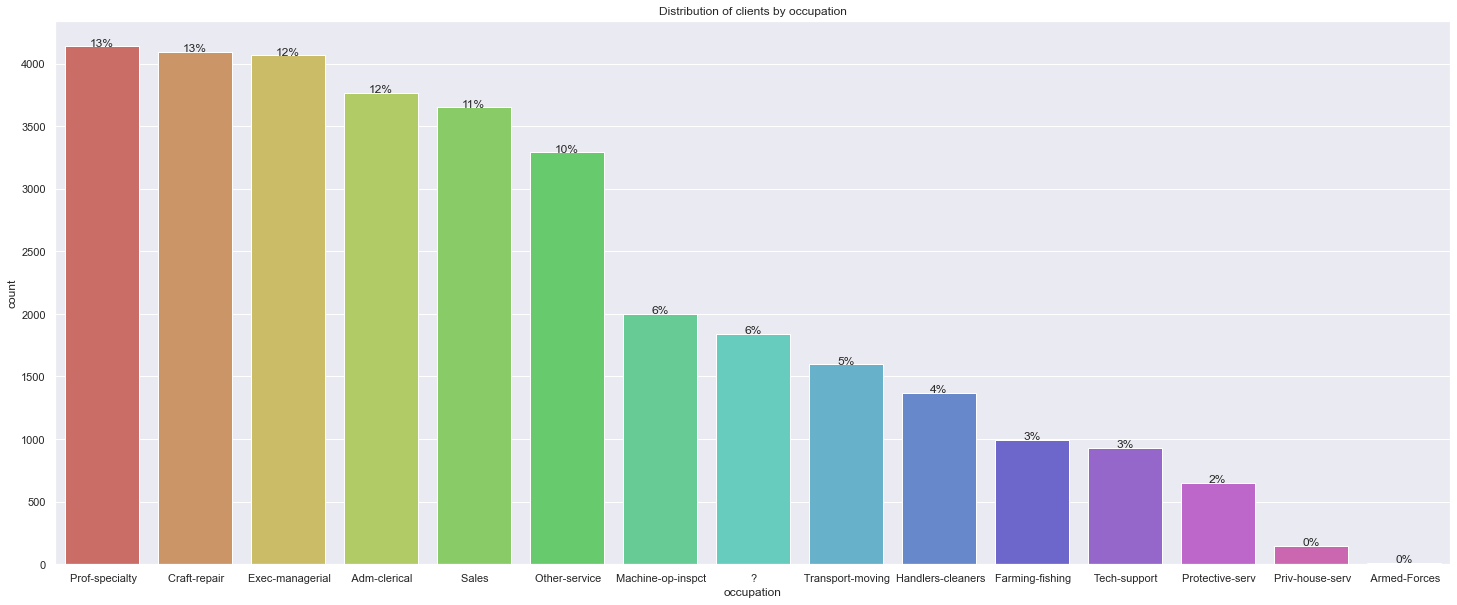

In [319]:
plt.figure(figsize = (25, 10))
occx = sns.countplot(x=df["occupation"], palette="hls", 
                   order = df["occupation"].value_counts().index)
occx.set_title('Distribution of clients by occupation')
sns.set(font_scale= 1)
value=round(df["occupation"].value_counts()/len(df["occupation"])*100,2)

total= (32562)
for p in occx.patches:
    height = p.get_height()
    occx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/(total))*100),
            ha="center") 

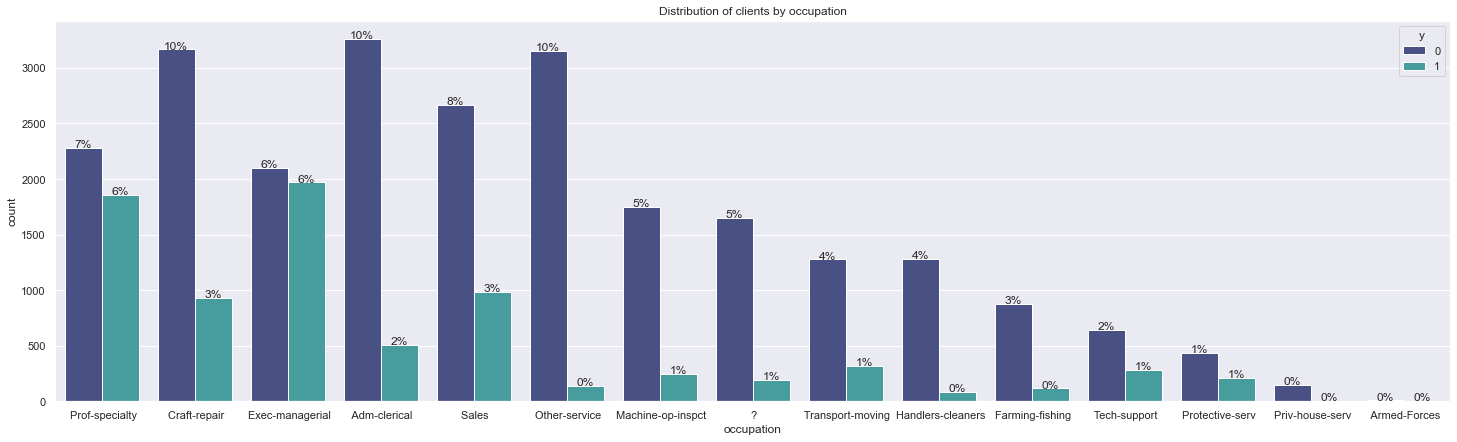

In [320]:
plt.figure(figsize = (25, 7))
occx = sns.countplot(x=df["occupation"], palette="mako", hue=df['y'],
                   order = df["occupation"].value_counts().index)
occx.set_title('Distribution of clients by occupation')
sns.set(font_scale= 1)
value=round(df["occupation"].value_counts()/len(df["occupation"])*100,2)

total= (32562)
for p in occx.patches:
    height = p.get_height()
    occx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/(total))*100),
            ha="center") 

As we were expecting this is one of the most important categories because it shows us how there are occupations than have almost a half of their people earning higher than 50K. In particular, careers as a Executive manager or occupations with professional specialties are more likely well paid.

### 3. Analizing the target

In [321]:
df['y'].value_counts()

0    24698
1     7839
Name: y, dtype: int64

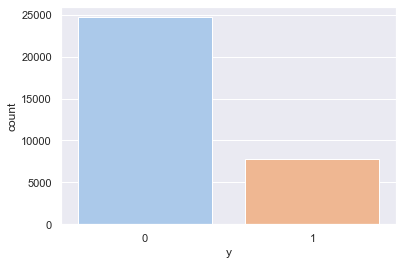

In [322]:
sns.countplot(df['y'], palette='pastel', data=df);

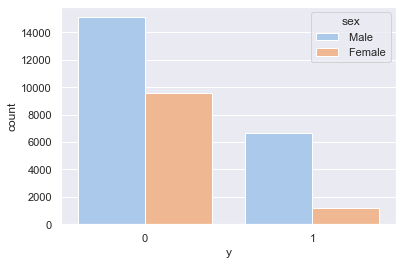

In [323]:
sns.countplot(df['y'], palette='pastel', hue='sex', data=df);

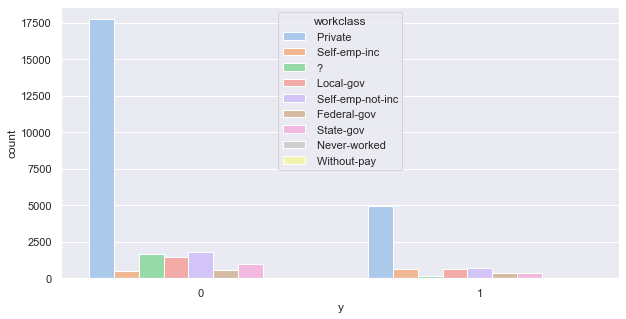

In [324]:
ax = plt.figure(figsize = (10,5))
sns.countplot(df['y'], palette='pastel', hue='workclass', data=df);


<AxesSubplot:>

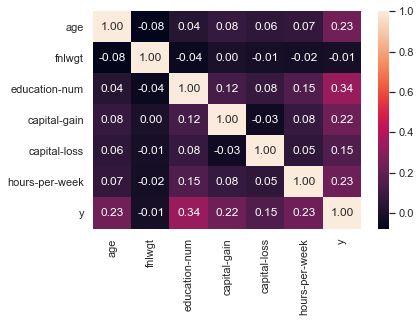

In [325]:
sns.heatmap(df.corr(), annot=True, fmt= '.2f')


### 4 Preparing the data

In [326]:
cens_prep = df.copy()

We have taken a copy of the dataset to maintain the cleaned one for later uses, and to use the copied one for preparing the data for the model.

In [327]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = MinMaxScaler()
cens_prep[numerical] = scaler.fit_transform(cens_prep[numerical])

In [328]:
cens_prep.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
22253,2e-01,Private,160594,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,3e-01,United-States,0
23647,3e-02,Private,177839,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,1e-01,United-States,0
7456,1e-01,Private,245029,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,4e-01,United-States,0


In [330]:
# Encoding
cens_prep['sex'] = cens_prep.sex.replace({"Female": 0, "Male": 1})


# Create dummy variables
cens_prep = pd.get_dummies(cens_prep)

In [331]:
encoded = list(cens_prep.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

109 total features after one-hot encoding.


### 5. Classification models

In [332]:
# import some classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [333]:
from sklearn.model_selection import train_test_split
# set apparent temperature as target
columns_value = cens_prep.columns
index = np.argwhere(columns_value == 'y')
columns_value_new = np.delete(columns_value, index)
data = pd.DataFrame(cens_prep, columns=columns_value_new)
# target as Y
selected_columns = ['y']
y_true = df[selected_columns].copy()
# X as indipendent 
X = data
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26029, 108) (26029, 1)
(6508, 108) (6508, 1)


In [334]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
31813,2e-01,293926,9,0,4e-01,3e-01,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17500,3e-01,110713,12,0,0e+00,5e-01,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9406,0e+00,406920,6,0,0e+00,4e-01,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22557,3e-02,25429,10,0,0e+00,2e-01,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11092,4e-01,114508,9,0,0e+00,4e-01,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [335]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [340]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed) 
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=kfold, n_jobs=1, scoring = 'accuracy').mean())

[[4628  361]
 [ 576  943]]
86.0


In [343]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') 
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed) 
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=kfold, n_jobs=1, scoring = 'accuracy').mean())

[[4347  642]
 [ 579  940]]
81.0


In [374]:
#from sklearn.svm import SVC
#svc= SVC(kernel = 'sigmoid')
#svc.fit(X_train, y_train)
#svcpred = svc.predict(X_test)
#print(confusion_matrix(y_test, svcpred))
#print(round(accuracy_score(y_test, svcpred),2)*100)
#SVCCV = (cross_val_score(svc, X_train, y_train, cv=kfold, n_jobs=1, scoring = 'accuracy').mean())

In [349]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed) 
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=kfold, n_jobs=1, scoring = 'accuracy').mean())

[[4593  396]
 [ 588  931]]
85.0


In [348]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=kfold, n_jobs=1, scoring = 'accuracy').mean())

[[1381 3608]
 [  44 1475]]
44.0


In [354]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=kfold, n_jobs=1, scoring = 'accuracy').mean())

[[4715  274]
 [ 585  934]]
87.0


In [360]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, LOGCV, GAUSIAN,GBKCV]})

models.sort_values(by='Score', ascending= False)

,Models,Score
4,Gradient Boosting,9e-01
0,Random Forest Classifier,9e-01
2,Logistic Model,9e-01
1,Decision Tree Classifier,8e-01
3,Gausian NB,4e-01


**Models Definitions:**

**Gradient boosting** is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

**Logistic regression**, despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

**Random forest** is a meta estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

**Naive Bayes classifiers** are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong  independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.

**Decision tree learning** is one of the predictive modelling approaches used in statistics, data mining and machine learning.  Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values are called regression trees.



**Evaluation Methodology:**
The data has been split into training and testing parts of the features and the label with a test size of 20% and with a random state to get the same randomness with the next runs. This happened by using the train_test_split function.

Cross-validation has been applied between the models to select the most suitable ones, We have done that using the cross_validate function with 7 folds splitting. And outputs the train and test score of the model.


Metrics used for Evaluation:
We have used the accuracy metric for the evaluation of the models. We can describe the accuracy metric as the ratio between the number of correct predictions and the total number of predictions.

 
Also, for binary classification, accuracy can also be calculated in terms of the confusion matrix terminology:
 
Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

### Conclusion:

The most accurated method to get a good prediction of our outcome it would be the **Gradient Boosting**

